In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import shuffle

In [2]:
train = pd.read_csv('./exp1_14drivers_14cars_dailyRoutes.csv')
train = train.dropna(how='all')

test = pd.read_csv('./exp2_19drivers_1car_1route.csv')
test = test.dropna(how='all')

c:\Users\night\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,2,4,5,6,9,10,14,15,16,20,21,22,23,24,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# utility function
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return float(h) * 3600 + float(m) * 60 + float(s)

In [4]:
# train set wrangling 
train_imputed = train.loc[train['SPEED'] != 0]
train_imputed = train_imputed.dropna(subset=['SPEED', 'MAF'])
train_imputed['MAF'] = train_imputed['MAF'].apply(lambda x : float(x.replace(',', '.')))
train_imputed['ENGINE_POWER'] = train_imputed['ENGINE_POWER'].apply(lambda x : float(x.replace(',', '.')))
train_imputed['FUEL_LEVEL'] = train_imputed['FUEL_LEVEL'].fillna('0,0%')
train_imputed['FUEL_LEVEL'] = train_imputed['FUEL_LEVEL'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
train_imputed['ENGINE_LOAD'] = train_imputed['ENGINE_LOAD'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
train_imputed['SHORT TERM FUEL TRIM BANK 1'] = train_imputed['SHORT TERM FUEL TRIM BANK 1'].fillna('0%')
train_imputed['SHORT TERM FUEL TRIM BANK 1'] = train_imputed['SHORT TERM FUEL TRIM BANK 1'].apply(lambda x : float(x.replace('%', '')))
train_imputed['THROTTLE_POS'] = train_imputed['THROTTLE_POS'].fillna('0,0%')
train_imputed['THROTTLE_POS'] = train_imputed['THROTTLE_POS'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
train_imputed['TIMING_ADVANCE'] = train_imputed['TIMING_ADVANCE'].fillna('0,0%')
train_imputed['TIMING_ADVANCE'] = train_imputed['TIMING_ADVANCE'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
train_imputed['EQUIV_RATIO'] = train_imputed['EQUIV_RATIO'].fillna('0,0%')
train_imputed['EQUIV_RATIO'] = train_imputed['EQUIV_RATIO'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
train_imputed['ENGINE_RUNTIME'] = train_imputed['ENGINE_RUNTIME'].fillna('0:0:0')
train_imputed['ENGINE_RUNTIME'] = train_imputed['ENGINE_RUNTIME'].apply(lambda x: get_sec(x))

In [5]:
#test set wrangling
test = test.dropna(subset=['SPEED', 'MAF'])
test['SPEED'] = test['SPEED'].apply(lambda x : float(x.replace('km/h', '')))
test_imputed = test.loc[test['SPEED'] != 0]
# remove dirty entries
test_imputed = test_imputed.drop([2661, 2699, 2643, 2976, 2980, 2631, 2993, 2922, 
                                        2808, 2861, 3004, 2789, 2826, 2644, 2645, 2659, 2744, 
                                        2935, 2692, 2698, 2837, 2675])

test_imputed['MAF'] = test_imputed['MAF'].fillna('0,0g/s')
test_imputed['MAF'] = test_imputed['MAF'].apply(lambda x : float(x.replace('g/s', '').replace(',', '.')))
test_imputed['FUEL_LEVEL'] = test_imputed['FUEL_LEVEL'].fillna('0,0%')
test_imputed['FUEL_LEVEL'] = test_imputed['FUEL_LEVEL'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
test_imputed['ENGINE_LOAD'] = test_imputed['ENGINE_LOAD'].fillna('0,0%')
test_imputed['ENGINE_LOAD'] = test_imputed['ENGINE_LOAD'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
test_imputed['SHORT TERM FUEL TRIM BANK 1'] = test_imputed['SHORT TERM FUEL TRIM BANK 1'].fillna('0%')
test_imputed['SHORT TERM FUEL TRIM BANK 1'] = test_imputed['SHORT TERM FUEL TRIM BANK 1'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
test_imputed['THROTTLE_POS'] = test_imputed['THROTTLE_POS'].fillna('0,0%')
test_imputed['THROTTLE_POS'] = test_imputed['THROTTLE_POS'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
test_imputed['TIMING_ADVANCE'] = test_imputed['TIMING_ADVANCE'].fillna('0,0%')
test_imputed['TIMING_ADVANCE'] = test_imputed['TIMING_ADVANCE'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
test_imputed['EQUIV_RATIO'] = test_imputed['EQUIV_RATIO'].fillna('0,0%')
test_imputed['EQUIV_RATIO'] = test_imputed['EQUIV_RATIO'].apply(lambda x : float(x.replace('%', '').replace(',', '.')))
test_imputed['AIR_INTAKE_TEMP'] = test_imputed['AIR_INTAKE_TEMP'].fillna('1C')
test_imputed['AIR_INTAKE_TEMP'] = test_imputed['AIR_INTAKE_TEMP'].apply(lambda x : float(x.replace('C', '').replace(',', '.')))
test_imputed['INTAKE_MANIFOLD_PRESSURE'] = test_imputed['INTAKE_MANIFOLD_PRESSURE'].fillna('0kPa')
test_imputed['INTAKE_MANIFOLD_PRESSURE'] = test_imputed['INTAKE_MANIFOLD_PRESSURE'].apply(lambda x : float(x.replace('kPa', '').replace(',', '.')))
test_imputed['ENGINE_RPM'] = test_imputed['ENGINE_RPM'].fillna('0RPM')
test_imputed['ENGINE_RPM'] = test_imputed['ENGINE_RPM'].apply(lambda x : float(x.replace('RPM', '').replace(',', '.')))
test_imputed['AMBIENT_AIR_TEMP'] = test_imputed['AMBIENT_AIR_TEMP'].fillna('0C')
test_imputed['AMBIENT_AIR_TEMP'] = test_imputed['AMBIENT_AIR_TEMP'].apply(lambda x : float(x.replace('C', '').replace(',', '.')))
test_imputed['ENGINE_COOLANT_TEMP'] = test_imputed['ENGINE_COOLANT_TEMP'].fillna('0C')
test_imputed['ENGINE_COOLANT_TEMP'] = test_imputed['ENGINE_COOLANT_TEMP'].apply(lambda x : float(x.replace('C', '').replace(',', '.')))
test_imputed['BAROMETRIC_PRESSURE(KPA)'] = test_imputed['BAROMETRIC_PRESSURE(KPA)'].fillna('0kPa')
test_imputed['BAROMETRIC_PRESSURE(KPA)'] = test_imputed['BAROMETRIC_PRESSURE(KPA)'].apply(lambda x : float(x.replace('kPa', '').replace(',', '.')))
test_imputed['ENGINE_RUNTIME'] = test_imputed['ENGINE_RUNTIME'].fillna('0:0:0')
test_imputed['ENGINE_RUNTIME'] = test_imputed['ENGINE_RUNTIME'].apply(lambda x: get_sec(x))

In [6]:
# 14 features train set
train_imputed = train_imputed.drop(columns=['FUEL_PRESSURE', 'LONG TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 2', 'TROUBLE_CODES', 'FUEL_TYPE', 'DTC_NUMBER',
                                    'YEAR', 'MONTHS', 'DAYS_OF_WEEK', 'HOURS', 'MIN', 'MARK',  'MODEL','AUTOMATIC', 'VEHICLE_ID', 'TIMESTAMP',
                                    'CAR_YEAR', 'ENGINE_POWER'])
train_imputed = train_imputed.interpolate()
train_imputed = train_imputed.dropna()
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10246 entries, 204 to 45270
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BAROMETRIC_PRESSURE(KPA)     10246 non-null  float64
 1   ENGINE_COOLANT_TEMP          10246 non-null  float64
 2   FUEL_LEVEL                   10246 non-null  float64
 3   ENGINE_LOAD                  10246 non-null  float64
 4   AMBIENT_AIR_TEMP             10246 non-null  float64
 5   ENGINE_RPM                   10246 non-null  float64
 6   INTAKE_MANIFOLD_PRESSURE     10246 non-null  float64
 7   MAF                          10246 non-null  float64
 8   AIR_INTAKE_TEMP              10246 non-null  float64
 9   SPEED                        10246 non-null  float64
 10  SHORT TERM FUEL TRIM BANK 1  10246 non-null  float64
 11  ENGINE_RUNTIME               10246 non-null  float64
 12  THROTTLE_POS                 10246 non-null  float64
 13  TIMING_ADVANCE

In [7]:
# 14 features test set
test_imputed = test_imputed.drop(columns=['FUEL_PRESSURE', 'Short Term Fuel Trim Bank 2', 'TROUBLE_CODES', 'FUEL_TYPE', 'DTC_NUMBER',
                                    'Term Fuel Trim Bank 1', 'FUEL_ECONOMY', 'Long Term Fuel Trim Bank 2', 'FUEL_TYPE', 'FUEL_PRESSURE',
                                    'TIME', 'LATITUDE', 'LONGITUDE', 'VEHICLE_ID', 'ALTITUDE'])
test_imputed = test_imputed.interpolate()
test_imputed = test_imputed.fillna(0)
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6859 entries, 0 to 8260
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BAROMETRIC_PRESSURE(KPA)     6859 non-null   float64
 1   ENGINE_COOLANT_TEMP          6859 non-null   float64
 2   FUEL_LEVEL                   6859 non-null   float64
 3   ENGINE_LOAD                  6859 non-null   float64
 4   AMBIENT_AIR_TEMP             6859 non-null   float64
 5   ENGINE_RPM                   6859 non-null   float64
 6   INTAKE_MANIFOLD_PRESSURE     6859 non-null   float64
 7   MAF                          6859 non-null   float64
 8   AIR_INTAKE_TEMP              6859 non-null   float64
 9   SPEED                        6859 non-null   float64
 10  SHORT TERM FUEL TRIM BANK 1  6859 non-null   float64
 11  ENGINE_RUNTIME               6859 non-null   float64
 12  THROTTLE_POS                 6859 non-null   float64
 13  TIMING_ADVANCE    

In [8]:
# concatnate 2 datasets 
total = pd.concat([train_imputed, test_imputed])


In [9]:
# sns.pairplot(total,kind='reg')

In [10]:
'''calculate fuel rate using the formula: 
fuel rate [L/H] = (MAF * 3600) / AFR / FD
where AFR = air-to-fuel ratio and FD = fuel density
both AFR and FD are constants 

calculate fuel consumption using the formula: 
fuel consumption [L/100KM] = fuel rate / speed * 100 '''

total['FUEL_RATE'] = (total['MAF'] * 3600) / 14.7 / 820

total['FUEL_CONSUMPTION'] = (total['FUEL_RATE'] / total['SPEED']) * 100


<AxesSubplot:>

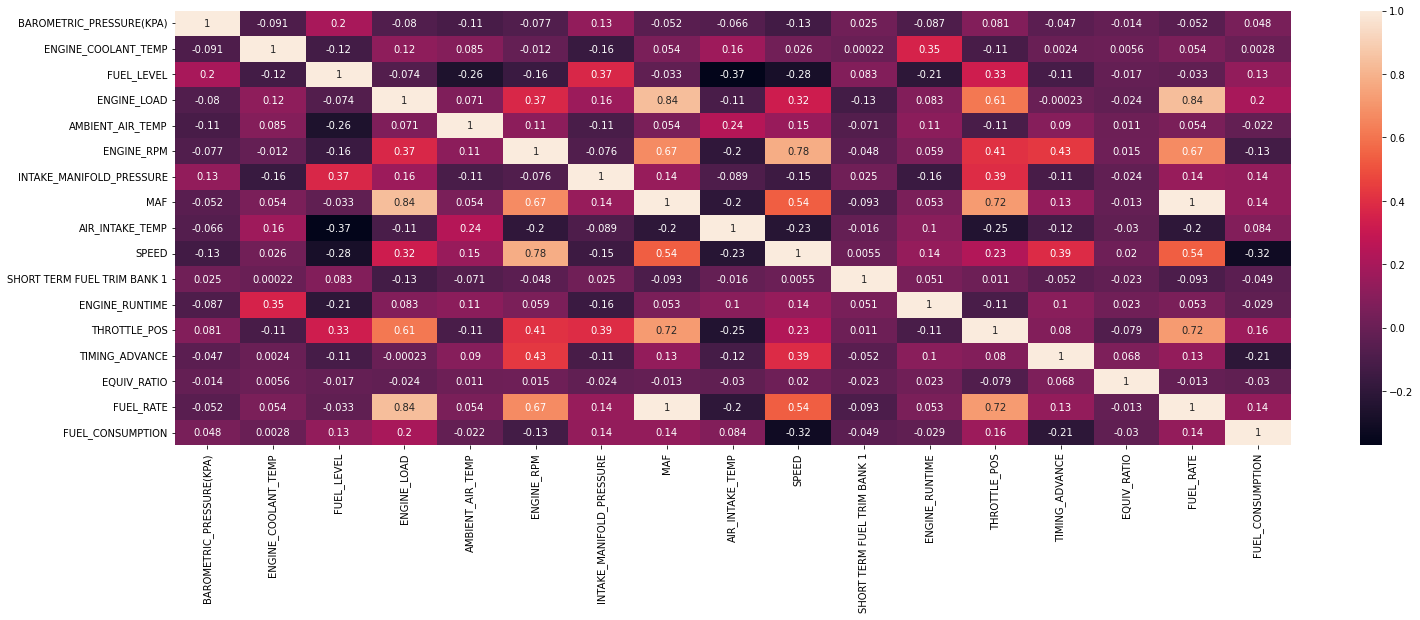

In [16]:
plt.figure(figsize = (25,8))
sns.heatmap(total.iloc[:,:].corr(),annot=True)

In [13]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17105 entries, 204 to 8260
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BAROMETRIC_PRESSURE(KPA)     17105 non-null  float64
 1   ENGINE_COOLANT_TEMP          17105 non-null  float64
 2   FUEL_LEVEL                   17105 non-null  float64
 3   ENGINE_LOAD                  17105 non-null  float64
 4   AMBIENT_AIR_TEMP             17105 non-null  float64
 5   ENGINE_RPM                   17105 non-null  float64
 6   INTAKE_MANIFOLD_PRESSURE     17105 non-null  float64
 7   MAF                          17105 non-null  float64
 8   AIR_INTAKE_TEMP              17105 non-null  float64
 9   SPEED                        17105 non-null  float64
 10  SHORT TERM FUEL TRIM BANK 1  17105 non-null  float64
 11  ENGINE_RUNTIME               17105 non-null  float64
 12  THROTTLE_POS                 17105 non-null  float64
 13  TIMING_ADVANCE 

In [14]:
# # uncomment the next two cells to create a new random shaffled dataset and output corresponding csv files

# # split shuffled train and test sets
# total = shuffle(total)
# train_shuffled = total.iloc[:10000, :]
# test_shuffled = total.iloc[10000:, :]

In [15]:
# total.to_csv("{}.csv".format('total_16features'), index = False)
# train_shuffled.to_csv("{}.csv".format('train_shuffled_16features'), index = False)
# test_shuffled.to_csv("{}.csv".format('test_shuffled_16features'), index = False)